In [9]:
# imporing necessary packages
import pandas as pd
import numpy as np
import sympy.mpmath as math
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Paramertization of the model

rmax = 1
kn = 0.5
qp = 0.08
qz = 0.02
b = 0.5
gmax = 0.5
Iv = 1.2
dep = 20

In [42]:
# defining the parameterization equations
def r(p, t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))/24*(10**(-0.1*0.007*p*dep))
def cz(p):
    return gmax*(1-math.e**(-1.2*p))
def cp(n):
    return n/(kn+n)

# defining the differential n, p, z equations
def n_prime(n, p, z, cz, cp):
  return (qp*p) + (qz*z) + b*cz*z - cp*p
def p_prime(n, p, z, r, cz, cp):
  return (rmax*p*cp*r)-(qp*p)-(cz*z)
def z_prime(p, z, cz):
  return (1-b)*cz-qz*z 

#initial values
t = 0
t_i = 0.1
p = 0.1
z = 0.3
n = 4.5

t_array = []
p_array = []
z_array = []
n_array = []

while t <= 400:
  t = t + t_i
  #new_r = r(p, t)
  #new_cz = cz(p)
  #new_cp = cp(n)
  new_n = n_prime(n, p, z, cz(p), cp(n))*t_i + n
  new_p = p_prime(n, p, z, r(p, t), cz(p), cp(n))*t_i + p
  new_z = z_prime(p, z, cz(p))*t_i + z
  p, z, n = new_p, new_z, new_n
  #r, cz, cp = new_r, new_cz, new_cp
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)



{'time': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 3.800000000000002, 3.900000000000002, 4.000000000000002, 4.100000000000001, 4.200000000000001, 4.300000000000001, 4.4, 4.5, 4.6, 4.699999999999999, 4.799999999999999, 4.899999999999999, 4.999999999999998, 5.099999999999998, 5.1999999999999975, 5.299999999999997, 5.399999999999997, 5.4999999999999964, 5.599999999999996, 5.699999999999996, 5.799999999999995, 5.899999999999995

In [43]:
output_df = pd.DataFrame(output)
output_df.to_csv('output.csv')

In [44]:
npz_model = pd.read_csv('output.csv', sep=',')
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton
0,0,4.493248,0.100517,0.1,0.302227
1,1,4.486470,0.101024,0.2,0.304463
2,2,4.479667,0.101521,0.3,0.306709
3,3,4.472839,0.102009,0.4,0.308963
4,4,4.465988,0.102486,0.5,0.311225


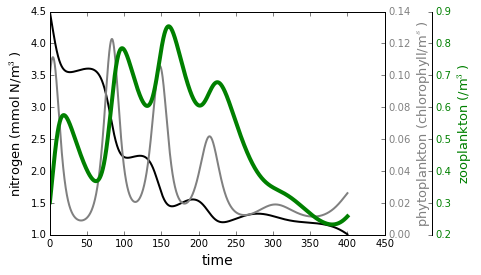

In [45]:
# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (mmol N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (chlorophyll/m$^s$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')
    
plt.show()